# Proyecto 1 Minería de datos


### Integrantes  
 Andrés Felipe Gutiérrez  
 Andrés Otriz  
 Juan David Cortes  
 Freddy Correa  

## Lectura de librerías y bases de datos

In [40]:
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler,scale,robust_scale

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
import numpy as np
from numpy import sqrt

# Librerías de Regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [79]:
#Lectura del data set
df_train= pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')
df_train['label']='Train'
df_test= pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)
df_test['label']='Test'

## Estandarización de datasets

In [80]:
#Unir bases de datos
concat_df=pd.concat([df_train,df_test],axis=0,sort=False)

In [81]:
#Tratamiento de variables continuas ESTANDARIZACIÓN
x_array=concat_df.drop(['Price','State','Make','Model','label'],axis=1)
norm_X = pd.DataFrame(scale(x_array), columns=x_array.columns, index=x_array.index)
norm_X['Price']=concat_df['Price']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


## Tratamiento de variables categóricas

In [82]:
#Aplicar tratamiento categorico BINARY
X_ = ce.BinaryEncoder().fit_transform(concat_df.drop(['Price','Year','Mileage'], axis=1))

#Agregar variables contiuas
X_[['Year','Mileage','Price']]=norm_X[['Year','Mileage','Price']]

## Separar datasets y enviar a csv

In [83]:
#Separar data sets
train_df=X_[X_['label_1']==1]
train_df=train_df.drop(['label_1','label_0'],axis=1)
test_df=X_[X_['label_0']==1]
test_df=test_df.drop('Price',axis=1)
test_df=test_df.drop(['label_1','label_0'],axis=1)

In [84]:
train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv')

## Creación del modelo

In [ ]:
#Leer tablas tratadas
df_train= pd.read_csv('train_df.csv')
df_test= pd.read_csv('test_df.csv', index_col=0)

In [ ]:
X=df_train.drop('Price',axis=1)
y=df_train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

reg=RandomForestRegressor(n_estimators=1500, max_depth=16, max_features=16, random_state=81).fit(X_train,y_train)

y_pred=reg.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))

print('RMSE:',rmse)

## Ajuste de parámetros

In [ ]:
# Cross Validation para los parámetros del modelo (max_depth,max_features,random_state)
range_ = range(1, 70, 10)

# Guardar los valores de RMSE del parámetro que se está estimando
rmse = []

for paramter in range_:
    reg = xgb.RandomForestRegressor(max_depth=paramter, random_state=81)
    rmse.append(cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error').mean())
    print(depth)
    
# Graficar el parámetro en el ejex y el RMSE en el eje y
plt.plot(range_, rmse)
plt.xlabel('Parametro')
plt.ylabel('rmse')


# Mostrar el valor del parámetro con el menor RMSE
sorted(zip(rmse, range_))[::-1][0]

## Hacer predicciones y enviar el modelo a CSV

In [ ]:
y_pred=pd.DataFrame(reg.predict(df_test), columns=['Price'])
y_pred.to_csv('test_submission.csv', index_label='ID')

## API con el modelo en línea 

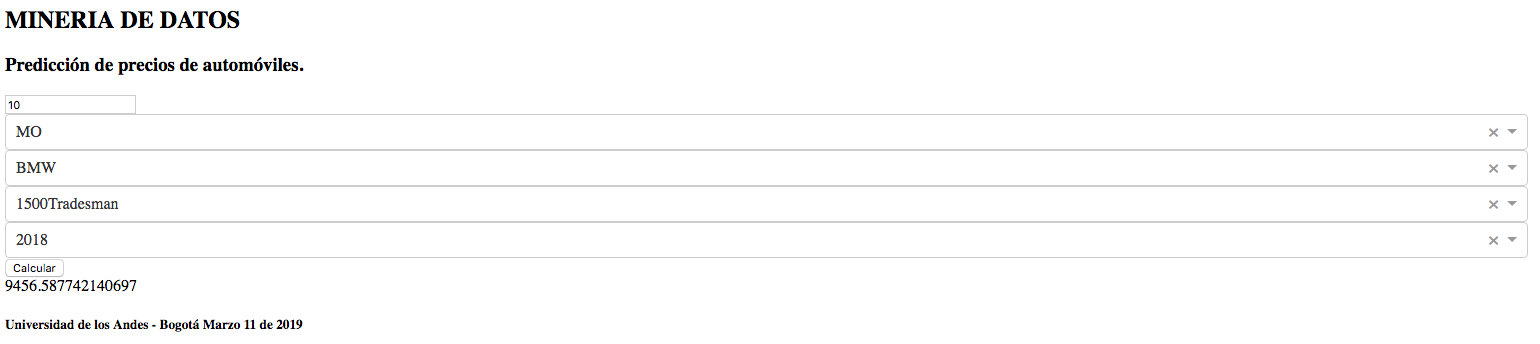

In [1]:
from IPython.display import Image
Image("API.png")

URL de la API:
http://ec2-18-191-162-187.us-east-2.compute.amazonaws.com:8583/